Data Science Project: MONIKA PATIAL

The aim of the study is to predict housing price using multiple linear regression.

In [1]:
# Importing libraries:

import pandas as pd
import numpy as np

# Data Visualisation packages

import seaborn as sns
import matplotlib.pyplot as plt

# Reading data
data = pd.read_csv('housing_prices.csv')

Dataset contains the information of 156 house prices.

- Price: Price of the house
- Bedroom: Number of bedrooms
- Space: Size of the house (in square feet)
- Room: Number of rooms
- Lot: Width of lot
- Tax: Annual tax
- Bathroom: Number of bathrooms 
- Garage: Number of parking lots in the garage
- Condition: Condition of the house (good or bad)

### Understanding the data

In [2]:
data.head(10)

,Price,Bedroom,Space,Room,Lot,Tax,Bathroom,Garage,Condition
0,530000.0,2.0,967.0,5.0,39.0,652.0,1.5,0.0,Bad
1,550000.0,2.0,815.0,5.0,33.0,1000.0,1.0,2.0,Good
2,560000.0,3.0,900.0,5.0,35.0,897.0,1.5,1.0,Bad
3,580000.0,3.0,1007.0,6.0,24.0,964.0,1.5,2.0,Bad
4,640000.0,3.0,1100.0,7.0,50.0,1099.0,1.5,1.5,Bad
5,440000.0,4.0,897.0,7.0,25.0,960.0,2.0,1.0,Bad
6,490000.0,5.0,1400.0,8.0,NaN,678.0,1.0,1.0,Good
7,700000.0,3.0,2261.0,6.0,29.0,2700.0,1.0,2.0,Bad
8,720000.0,4.0,1290.0,8.0,NaN,800.0,1.5,1.5,Bad
9,820000.0,4.0,2104.0,9.0,40.0,1038.0,2.5,1.0,Good


In [3]:
# Columns in the data
data.columns
numeric_columns = data._get_numeric_data().columns.to_list()
categorical_columns = list(set(data.columns.to_list()) - set(numeric_columns))
print('Numerical Columns :')
print(numeric_columns)
print('\n Categorical Columns :')
print(categorical_columns)

Numerical Columns :
['Price', 'Bedroom', 'Space', 'Room', 'Lot', 'Tax', 'Bathroom', 'Garage']

 Categorical Columns :
['Condition']


In [4]:
# Information about the data features 
data.info()
print("DATA Shape:",data.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Price      156 non-null    float64
 1   Bedroom    156 non-null    float64
 2   Space      146 non-null    float64
 3   Room       156 non-null    float64
 4   Lot        146 non-null    float64
 5   Tax        147 non-null    float64
 6   Bathroom   156 non-null    float64
 7   Garage     156 non-null    float64
 8   Condition  156 non-null    object 
dtypes: float64(8), object(1)
memory usage: 11.2+ KB
DATA Shape: (157, 9)


In [5]:
# Data Description
data.describe()

,Price,Bedroom,Space,Room,Lot,Tax,Bathroom,Garage
count,156.000000,156.000000,146.000000,156.000000,146.000000,147.000000,156.000000,156.000000
mean,564743.589744,3.166667,1097.246575,6.500000,32.808219,911.707483,1.480769,0.846154
std,128753.070583,1.348037,462.540698,1.675247,8.457859,443.263430,0.529408,0.808454
min,320000.000000,1.000000,539.000000,4.000000,24.000000,418.000000,1.000000,0.000000
25%,460000.000000,2.000000,805.250000,5.000000,25.000000,652.500000,1.000000,0.000000
50%,550000.000000,3.000000,965.500000,6.000000,30.000000,821.000000,1.500000,1.000000
75%,650000.000000,4.000000,1220.500000,7.000000,37.000000,1012.500000,2.000000,1.500000
max,900000.000000,8.000000,2295.000000,12.000000,50.000000,2752.000000,3.000000,2.000000


### Exploratory data analysis: 

The first step is to analyze and investigate data.

In [6]:
# Feature distribution
def basic_details(dataset):
    details = pd.DataFrame()
    details['Missing values'] = dataset.isnull().sum()
    details['Missing values (%)'] = round(dataset.isnull().sum()/dataset.shape[0]*100)
    details['N unique value'] = dataset.nunique()
    details['dtype'] = dataset.dtypes
    return details

basic_details(data)

,Missing values,Missing values (%),N unique value,dtype
Price,1,1.0,47,float64
Bedroom,1,1.0,7,float64
Space,11,7.0,137,float64
Room,1,1.0,7,float64
Lot,11,7.0,11,float64
Tax,10,6.0,138,float64
Bathroom,1,1.0,5,float64
Garage,1,1.0,4,float64
Condition,1,1.0,2,object


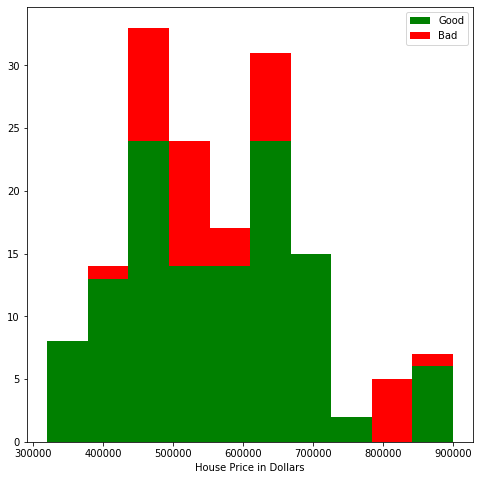

In [7]:
# Price Distribution 
plt.figure(figsize=(8,8))
plt.hist(x = [data[data['Condition']=='Bad']['Price'], 
              data[data['Condition']=='Good']['Price']], 
         stacked=True, color = ['g','r'],label = ['Good','Bad'], bins=10)
plt.xlabel('House Price in Dollars')
plt.legend()

### Handling Categorical Features

In [8]:
# Changing Catergorial Condition data into Numerical Values of 0 and 1 
data['Condition'] = data['Condition'].map({'Bad': 0, "Good": 1})

### Understanding the data

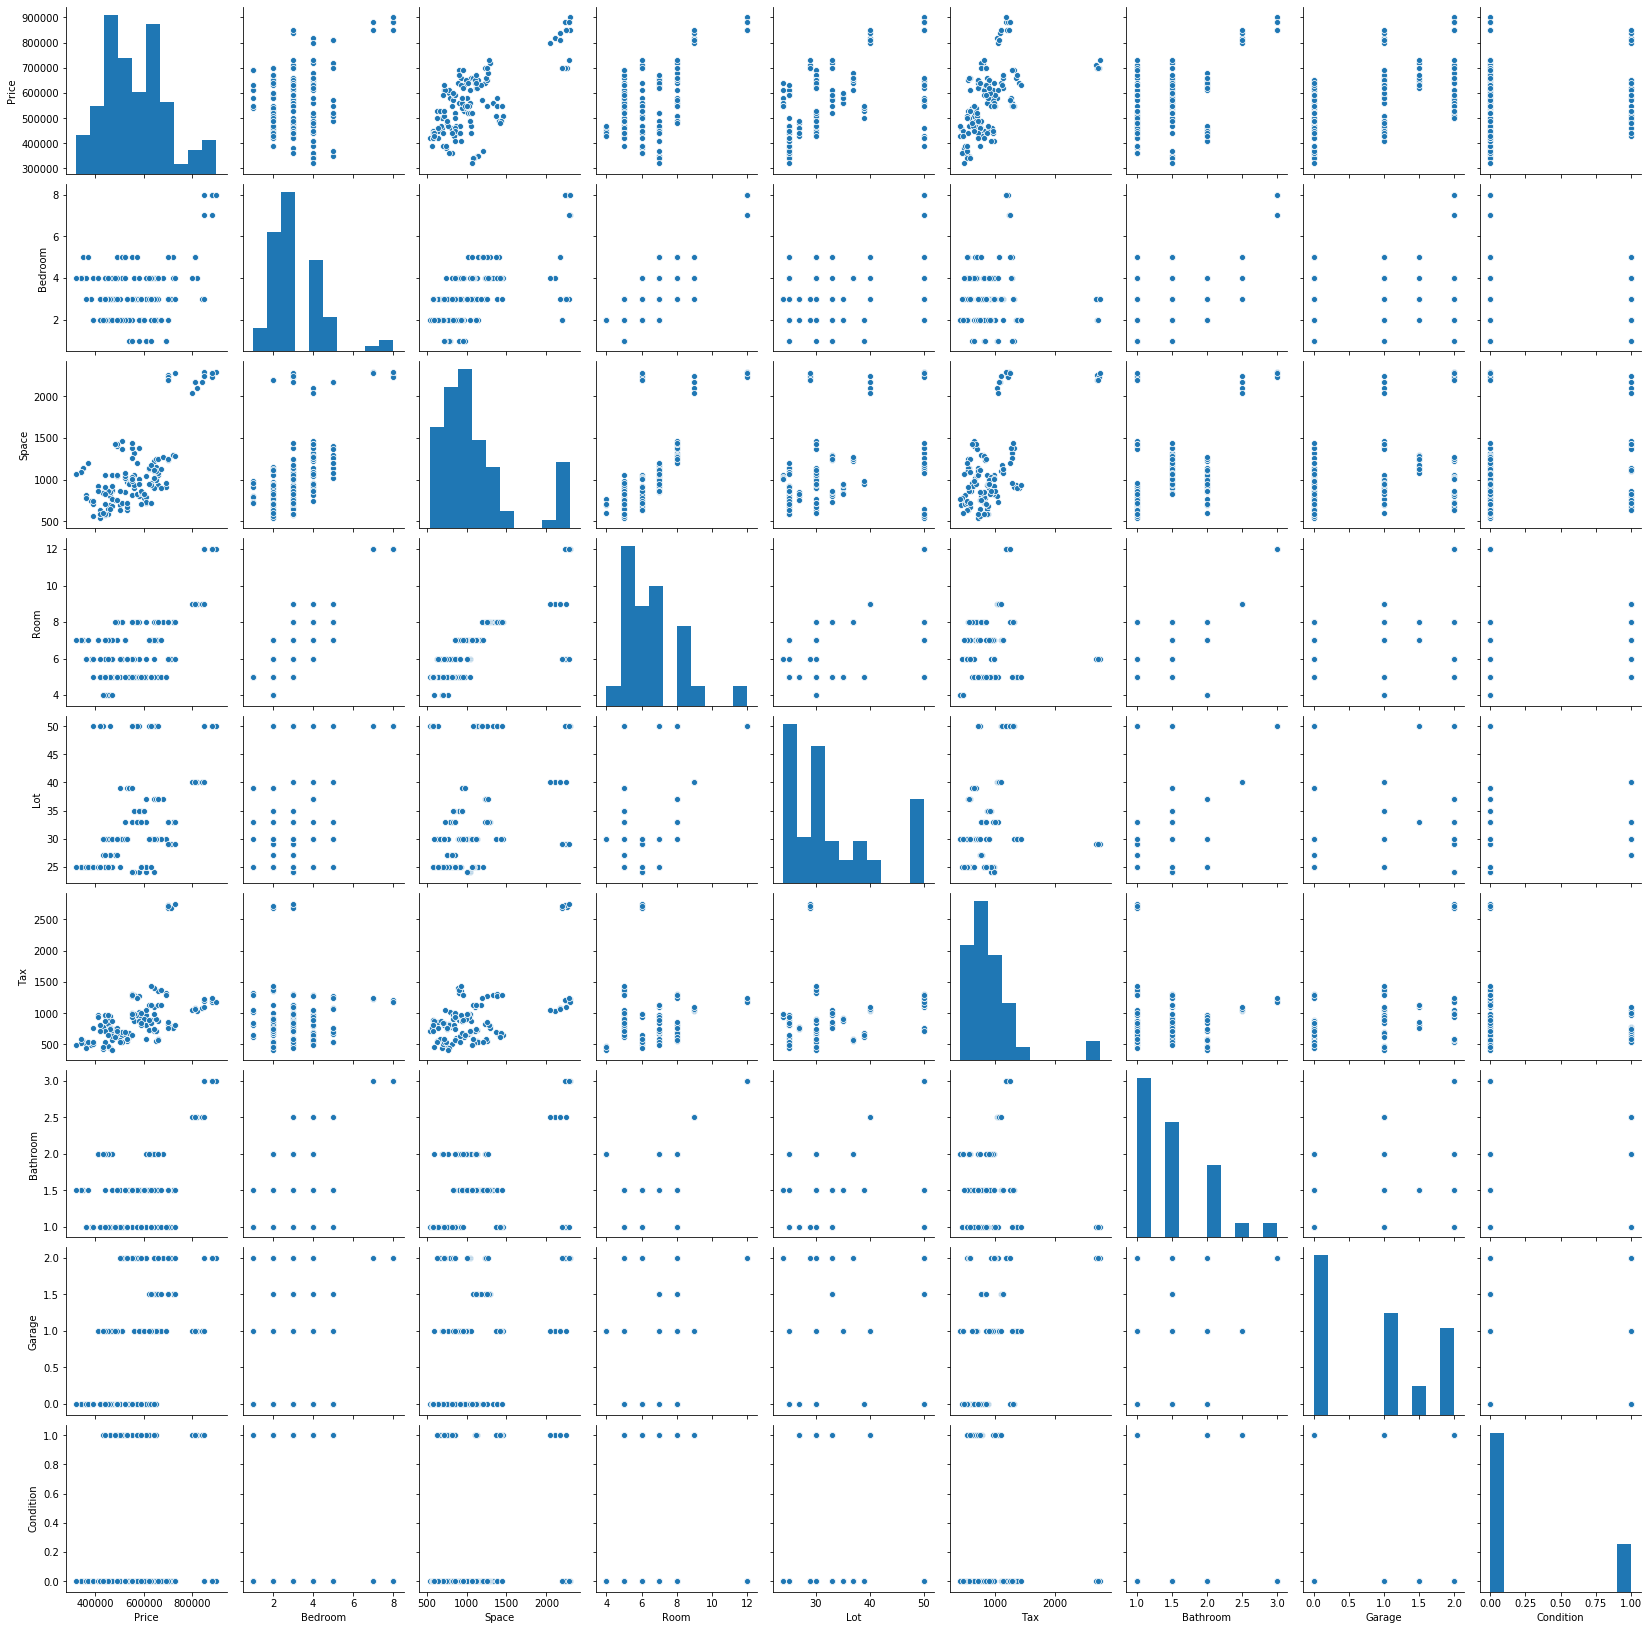

In [9]:
sns.pairplot(data)

### Correlation coefficients

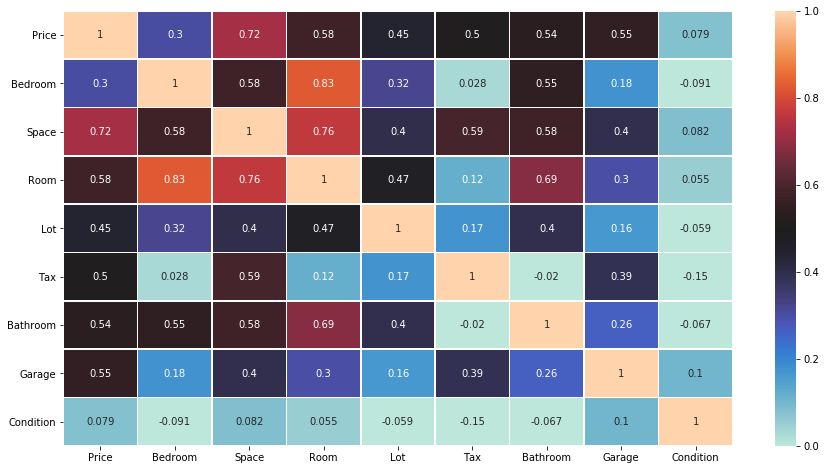

In [10]:
plt.figure(figsize = (15, 8))
sns.heatmap(data.corr(),vmin = 0,vmax = 1,cmap = "icefire",
            linewidths = 0.75,annot=True)
plt.show()

### Visualising the distribution of missing values in the data.

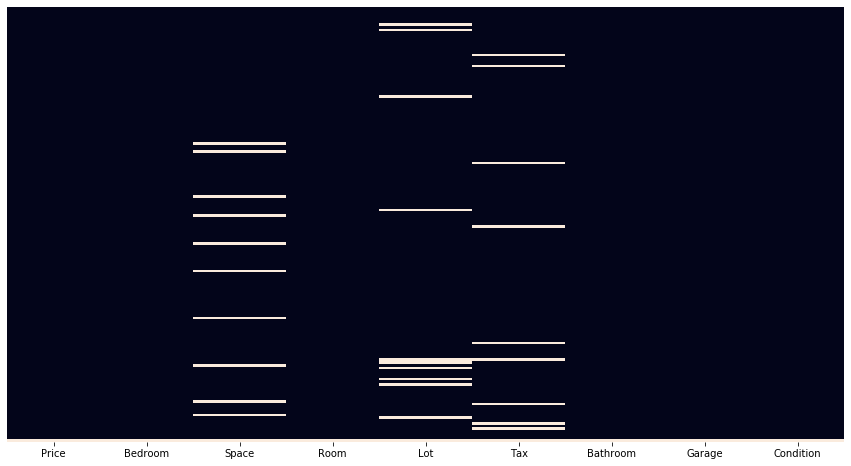

In [11]:
plt.figure(figsize = (15, 8))
sns.heatmap(data.isnull(),yticklabels=False, cbar = False)
plt.show()

### Data Cleaning

In [12]:
# null values in dataset
data.isnull().sum()

Price         1
Bedroom       1
Space        11
Room          1
Lot          11
Tax          10
Bathroom      1
Garage        1
Condition     1
dtype: int64

### Visualising Outliers 

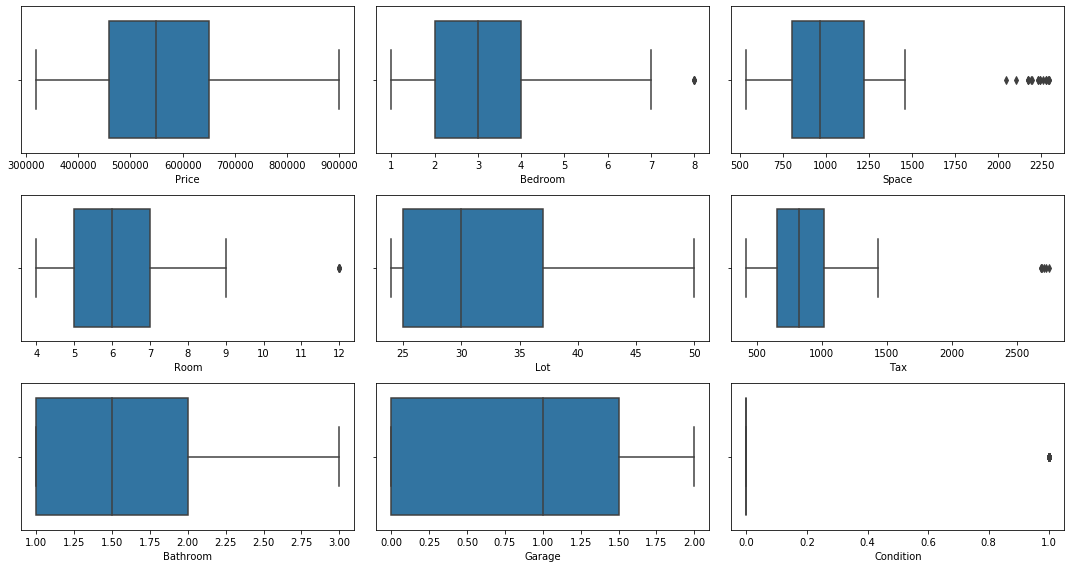

In [13]:
fig, axs = plt.subplots(3,3, figsize = (15,8))
sns.boxplot(data.Price,ax = axs[0,0]),sns.boxplot(data.Bedroom,ax = axs[0,1]),
sns.boxplot(data.Space,ax = axs[0,2])
sns.boxplot(data.Room,ax = axs[1,0]),sns.boxplot(data.Lot,ax = axs[1,1]),
sns.boxplot(data.Tax,ax = axs[1,2])
sns.boxplot(data.Bathroom,ax = axs[2,0]),sns.boxplot(data.Garage,ax = axs[2,1]),
sns.boxplot(data.Condition,ax = axs[2,2])
plt.tight_layout()

### Outlier Treatment

In [14]:
# Bedroom, Space, Room and Tax have Outliers
# Looking at pairplot(correlations) we could keep Space and Bedroom outliers as they fits in trend, 
# and remove Tax and Room Outliers 

Q1 = data.Tax.quantile(0.25)
Q3 = data.Tax.quantile(0.75)
IQR = Q3 - Q1
data = data[(data.Tax >= Q1 - 1.5 * IQR) & (data.Tax <= Q3 + 1.5 * IQR)]

Q1 = data.Room.quantile(0.25)
Q3 = data.Room.quantile(0.75)
IQR = Q3 - Q1
data = data[(data.Room >= Q1 - 1.5 * IQR) & (data.Room <= Q3 + 1.5 * IQR)]

In [15]:
# Filling missing data
data = data.dropna(subset=['Price'])
data = data.fillna(method='ffill', axis = 0).fillna(method='bfill', axis = 0)

### Splitting the Data into Training /Testing Sets and Rescaling the Features

In [16]:

import sklearn
from sklearn.model_selection import  train_test_split
from sklearn.preprocessing import MinMaxScaler

x = data.drop("Price", axis = 1)
y = data.Price

x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(
    x,y,test_size=0.20,random_state=101)

y_train = np.asarray(y_train)
y_train = y_train.reshape(-1,1)

y_test = np.asarray(y_test)
y_test = y_test.reshape(-1,1)

x_scaler = MinMaxScaler()
y_scaler = MinMaxScaler()

x_train = x_scaler.fit_transform(x_train)
y_train = y_scaler.fit_transform(y_train)

x_test = x_scaler.fit_transform(x_test)
y_test = y_scaler.fit_transform(y_test)

print("Train Shape:",x_train.shape)
print("Test Shape:",x_test.shape)

Train Shape: (108, 8)
Test Shape: (27, 8)


### Linear Regression Model Building

Multiple Linear Regression is used for the prediction of house price based on rest other features.

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

lm = LinearRegression()
lm.fit(x_train,y_train)

y_pred = lm.predict(x_test)

model_parameters = {"Intercept": lm.intercept_ ,"Coefficients":lm.coef_}

#print('Intercept of the model:', lm.intercept_)
#print('Coefficient of model :', lm.coef_)

print('Mean absolute error: ', mean_absolute_error(y_test,y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R2 Score:', r2_score(y_test,y_pred))

Mean absolute error:  0.20542311633299437
RMSE: 0.23872739549681563
R2 Score: 0.36869952357621283


(-0.1, 1.2)

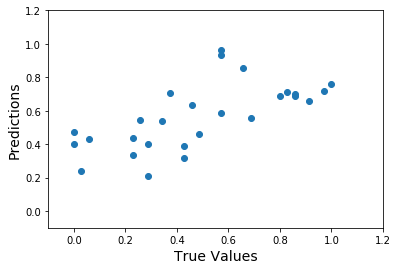

In [18]:
# Plotting Predictions and True values.
fig = plt.figure()
plt.scatter(y_test,y_pred)
plt.xlabel('True Values', fontsize=14)
plt.xlim(-0.1,1.2)
plt.ylabel('Predictions', fontsize=14)
plt.ylim(-0.1,1.2)

In [22]:
test_case = [float(input("Bedroom:")),float(input("Space:")),
             float(input("Room:")),float(input("Lot:")),
             float(input("Tax:")),float(input("Bathroom:")),
             float(input("Garage:")),
             {'Bad': 0, "Good": 1}.get(input("Condition (Bad/Good):"))]

test_case = x_scaler.transform([test_case])

price_predictions = lm.intercept_ + np.sum(lm.coef_ * test_case)
    
print('Price Prediction: ', 
      y_scaler.inverse_transform([price_predictions]))

Bedroom:3
Space:859
Room:5
Lot:33
Tax:994
Bathroom:1
Garage:2
Condition (Bad/Good):Good
Price Prediction:  [[537939.59734029]]


In [23]:
coeff  = pd.DataFrame((lm.coef_).T, x.columns, columns=['Coefficient'])
coeff

,Coefficient
Bedroom,-0.286626
Space,0.474345
Room,0.133243
Lot,0.027107
Tax,0.260504
Bathroom,0.089946
Garage,0.129411
Condition,0.006035


### The price of house based on the above case study is
$ = 0.20 - 0.28 \times Bedroom  + 0.47 \times Space + 0.13  \times Room + 0.03 \times Lot + 0.26 \times Tax + 0.09 \times Bathroom + 0.13 \times Garage + 0.01 \times Condition $